# ValSKA-HERA-beam-FWHM validation results

An open-source, reproducible, flexible, and extensible package for validating the sensitivity of 21-cm power spectrum forward modeling approaches to imperfect knowledge of the FWHM of the interferometric primary beam.

## Overview
TODO
 - Purpose of the notebook
 - Usage
 - ++


## Imports

In [1]:
from valska_hera_beam.plotting import BeamAnalysisPlotter
from valska_hera_beam.utils import get_default_path_manager
from valska_hera_beam.evidence import run_complete_bayeseor_analysis
from pathlib import Path


## Check paths
Confirm package directory paths look reasonable.

In [2]:
# Get path manager with automatic path detection
paths = get_default_path_manager()
# f-print all paths
print(f"{paths=}")

paths=PathManager:
  utils_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM/src/valska_hera_beam
  package_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM/src/valska_hera_beam
  base_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM
  chains_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM/chains
  data_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM/data
  results_dir: /share/nas-0-3/psims/test/UKSRC/validation/ValSKA-HERA-beam-FWHM/results


## Results

### Burba et al 2023 Case 1

Reproduction of Case 1 results from Burba et al 2023, using a Gaussian fit to the HERA primary beam and modelling with a restricted field-of-view.

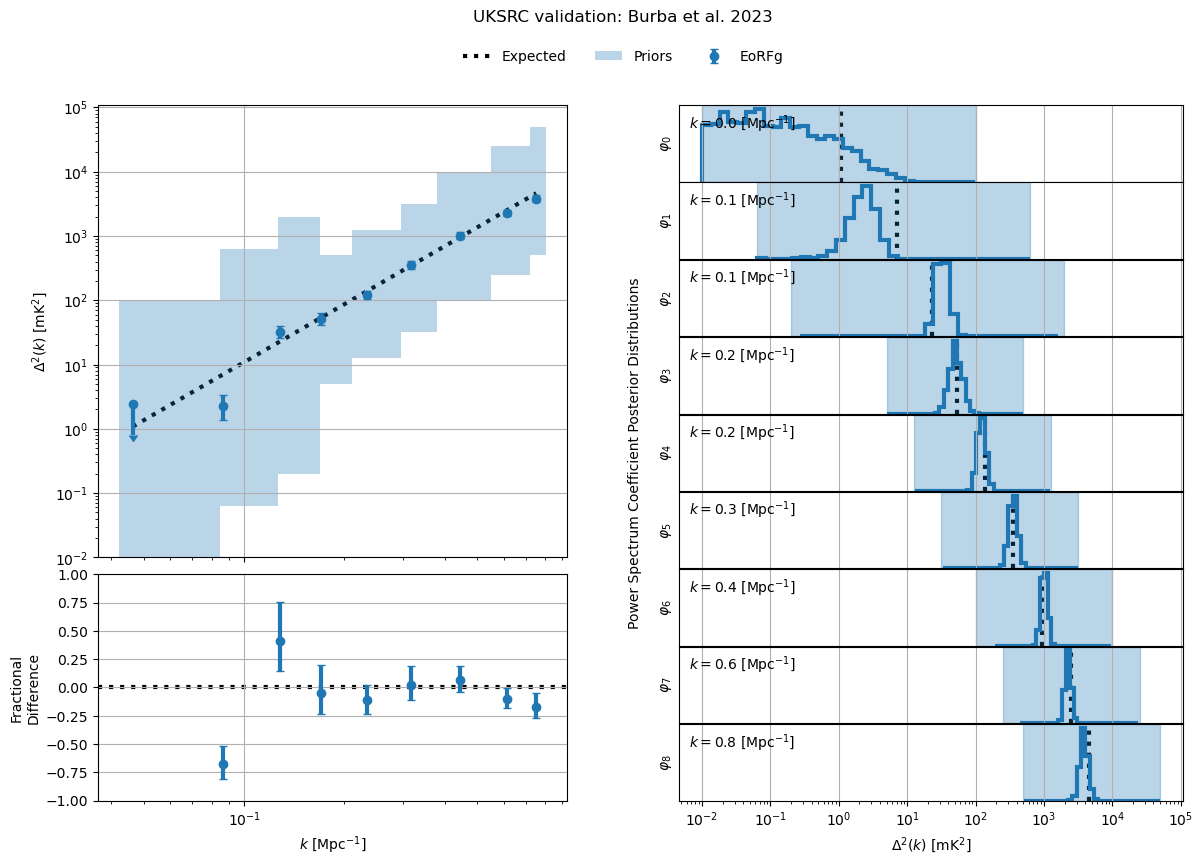

In [3]:
# For EoR signal
expected_ps = 214777.66068216303  # mK^2 Mpc^3
# For foreground-only signal
noise_ps = expected_ps / 2  # mK^2 Mpc^3

plotter = BeamAnalysisPlotter()
# fig = plotter.plot_analysis_results(analysis_keys=["GLEAM_FgEoR"], labels=["GLEAM"])
fig = plotter.plot_analysis_results(
    analysis_keys=["EoRFg"],
    labels=["EoRFg"],
    expected_ps=expected_ps,
    upper_limit_indices=[0],
)

base_chains_dir = Path(paths.chains_dir)

# Advanced usage with custom paths and settings
custom_plotter = BeamAnalysisPlotter(
    base_chains_dir=base_chains_dir,
    eor_ps=expected_ps,
    noise_ratio=0.5,
    default_expected_ps=expected_ps,
)


### HERA FWHM Sensitivity Analysis.

21-cm power spectrum posteriors recovered from foreground-only validation data with imperfect instrumental forward modelling parametrised by the percentage error in the beam FWHM. 

Spurious power spectrum detections correspond to failure of the validation test.

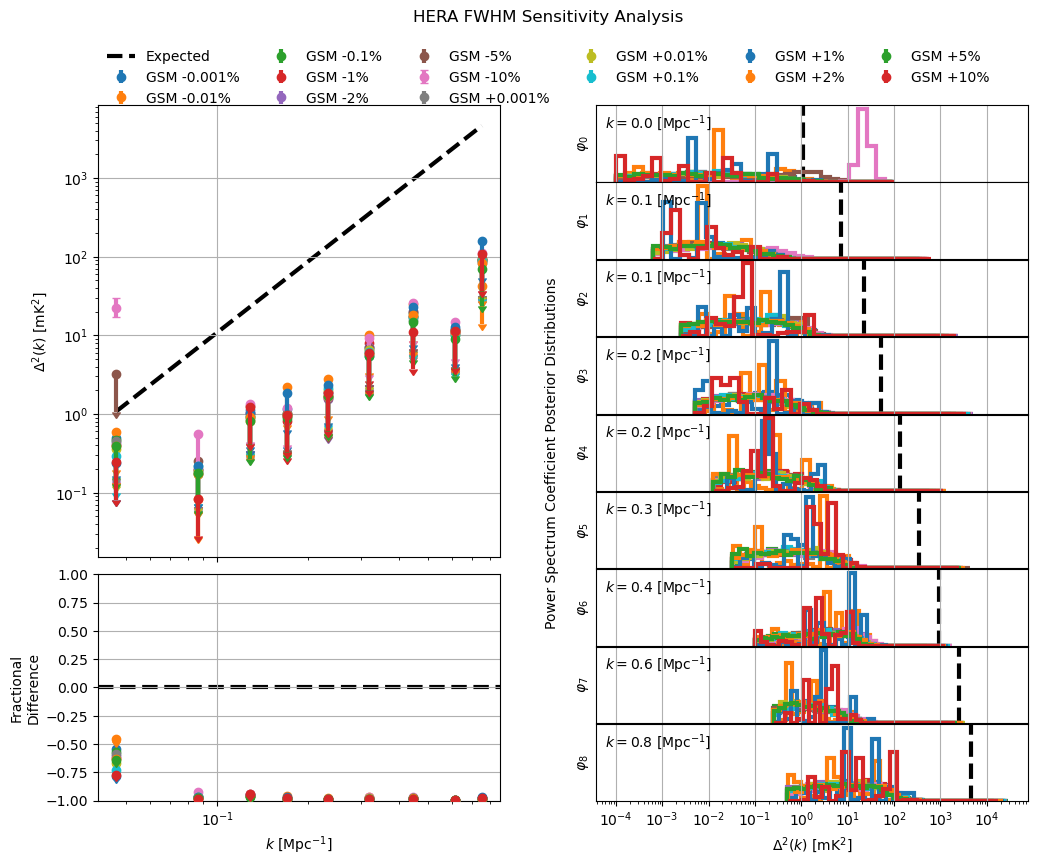

In [4]:
# Create a complex comparison plot

labels = [
    "GSM -0.001%",
    "GSM -0.01%",
    "GSM -0.1%",
    "GSM -1%",
    "GSM -10%",
    "GSM +0.001%",
    "GSM +0.01%",
    "GSM +0.1%",
    "GSM +1%",
    "GSM +10%",
]

group_labels = {labels[i]: labels[i] for i in range(len(labels))}

fig = custom_plotter.create_comparison_plot(
    groups={
        "GSM -0.001%": ["GSM_FgEoR_-1e-3pp"],
        "GSM -0.01%": ["GSM_FgEoR_-1e-2pp"],
        "GSM -0.1%": ["GSM_FgEoR_-1e-1pp"],
        "GSM -1%": ["GSM_FgEoR_-1e0pp"],
        "GSM -2%": ["GSM_FgEoR_-2e0pp"],
        "GSM -5%": ["GSM_FgEoR_-5e0pp"],
        "GSM -10%": ["GSM_FgEoR_-1e1pp"],
        "GSM +0.001%": ["GSM_FgEoR_+1e-3pp"],
        "GSM +0.01%": ["GSM_FgEoR_+1e-2pp"],
        "GSM +0.1%": ["GSM_FgEoR_+1e-1pp"],
        "GSM +1%": ["GSM_FgEoR_+1e0pp"],
        "GSM +2%": ["GSM_FgEoR_+2e0pp"],
        "GSM +5%": ["GSM_FgEoR_+5e0pp"],
        "GSM +10%": ["GSM_FgEoR_+1e1pp"],
    },
    # 1. Fix the expected label
    expected_label="Expected Noise Level",
    # 2. Set upper limit indices (all analyses will use these by default)
    upper_limit_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    # 3. Specify GSM -10% zeroth k-mode as a detection, not an upper limit
    detection_indices={"GSM_FgEoR_-1e1pp": [0]},
    # Other parameters
    figsize=(12, 10),
    plot_fracdiff=True,
    plot_priors=False,
    group_labels=group_labels,
    # Customize the expected line style if desired
    ls_expected="--",
)

### BaNTER validation

Calculation and interpretation of the Bayesian Evidence Null Test Evidence Ratio (BaNTER) validation statistic for all 21-cm power spectrum Bayesian null-tests run for the ValSKA-HERA-beam-FWHM project.

In [8]:
print("=== BaNTER Validation Analysis ===")
results = run_complete_bayeseor_analysis(
    dir_prefix=paths.chains_dir,
    show_progress=True,
)

=== BaNTER Validation Analysis ===
=== Complete BayesEoR Analysis ===
Analyzing 14 perturbation levels...
Perturbation levels: ['-1e-3pp', '-1e-2pp', '-1e-1pp', '-1e0pp', '-2e0pp', '-5e0pp', '-1e1pp', '+1e-3pp', '+1e-2pp', '+1e-1pp', '+1e0pp', '+2e0pp', '+5e0pp', '+1e1pp']


Analyzing: +1e1pp: 100%|██████████████████████| 14/14 [00:02<00:00,  6.27case/s]


COMPLETE BAYESEOR PERTURBATION ANALYSIS SUMMARY
Perturbation Log BF     Validation   Interpretation
--------------------------------------------------------------------------------
-1e-3pp      -8.397     ✅ PASS          Very strong evidence for model 2
-1e-2pp      -7.559     ✅ PASS          Very strong evidence for model 2
-1e-1pp      -7.506     ✅ PASS          Very strong evidence for model 2
-1e0pp       -7.576     ✅ PASS          Very strong evidence for model 2
-2e0pp       -7.443     ✅ PASS          Very strong evidence for model 2
-5e0pp       -6.596     ✅ PASS          Very strong evidence for model 2
-1e1pp       39.114     ❌ FAIL          Very strong evidence for model 1
+1e-3pp      -7.546     ✅ PASS          Very strong evidence for model 2
+1e-2pp      -7.553     ✅ PASS          Very strong evidence for model 2
+1e-1pp      -8.143     ✅ PASS          Very strong evidence for model 2
+1e0pp       -7.762     ✅ PASS          Very strong evidence for model 2
+2e0pp       -7